### Data Set: Tokyo
Visualización de datos del data set Tokyo.</br>
Exportación de librerias de Visualización del data set:

In [20]:
from pandasgui import show
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#plt.style.use("seaborn")

### Tipo de datos dentro del dataset

#### Tenemos las siguientes columnas:

- **id:** Un identificador único para cada registro en tu conjunto de datos. Este campo generalmente se utiliza para identificar de manera única cada entrada en el conjunto de datos.

- **name:** El nombre o título de la propiedad o alojamiento que se está listando en una plataforma como Airbnb. Este campo proporciona información sobre cómo se describe la propiedad.

- **host_id:** El identificador único del anfitrión que está listando la propiedad. Cada anfitrión tiene un número de identificación único.

- **host_name:** El nombre del anfitrión que está listando la propiedad. Este campo proporciona información sobre quién es el anfitrión.

- **neighbourhood_group:** La agrupación o categorización de vecindarios más grande o de nivel superior en una ciudad o área geográfica. Esto puede utilizarse para organizar los vecindarios en grupos más grandes para análisis.

- **neighbourhood:** El nombre del vecindario o área geográfica específica en la que se encuentra la propiedad. Esto proporciona información sobre la ubicación de la propiedad.

- **latitude:** La latitud geográfica de la ubicación de la propiedad. La latitud se utiliza para determinar la posición norte-sur en la Tierra.

- **longitude:** La longitud geográfica de la ubicación de la propiedad. La longitud se utiliza para determinar la posición este-oeste en la Tierra.

- **room_type:** El tipo de habitación o alojamiento que se está listando, como "habitación privada", "casa/apartamento completo" o "habitación compartida".

- **price:** El precio de alquiler por noche o por estancia en la propiedad. Este campo indica cuánto cuesta alojarse en la propiedad.

- **minimum_nights:** El número mínimo de noches que un huésped debe reservar para quedarse en la propiedad. Esto puede variar según la política del anfitrión.

- **number_of_reviews:** El número total de revisiones o comentarios que ha recibido la propiedad hasta la fecha. Esto puede proporcionar información sobre la popularidad y la calidad de la propiedad.

- **last_review:** La fecha de la última revisión o comentario dejado por un huésped en la propiedad. Esto puede ayudar a determinar cuándo fue la última vez que alguien se quedó en la propiedad.

- **reviews_per_month:** El promedio de revisiones o comentarios dejados por los huéspedes por mes. Esto puede indicar la tasa de actividad y el nivel de satisfacción de los huéspedes a lo largo del tiempo.


In [21]:
df = pd.read_csv("../data/tokyo_airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24


In [22]:
show (df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\psych\AppData\Local\Temp\ipykernel_6688\603652372.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\psych\AppData\Local\Temp\ipykernel_6688\603652372.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\psych\AppData\Local\Temp\ipykernel_6688\603652372.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\psych\AppData\Local\Temp\ipykernel_6688\603

Aplicamos una función para saber: 
Dataset tiene 14 columnas y 11466 fila.
- Valores únicos
- Ausencia de valores 
- Porcentaje de ausencia de valores
- Duplicado
- Tipo de valores

In [23]:
def summary(df):
    total_values = df.shape[0]
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    duplicated_counts = [df[col].duplicated().sum() for col in df.columns]
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} rows.")

    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)    
    summary["Duplicated"] = duplicated_counts
    summary["Types"] = df.dtypes
    
    return summary

# Call the summary function with your DataFrame
summary(df)

Dataset has 14 features and 11466 rows.


,Unique,Missing,Missing %,Duplicated,Types
id,11466,0,0.00,0,int64
name,10810,0,0.00,656,object
host_id,2954,0,0.00,8512,int64
host_name,2054,16,0.14,9411,object
neighbourhood_group,0,11466,100.00,11465,float64
neighbourhood,56,0,0.00,11410,object
latitude,7295,0,0.00,4171,float64
longitude,8140,0,0.00,3326,float64
room_type,3,0,0.00,11463,object
price,371,0,0.00,11095,int64


In [24]:
df.drop('neighbourhood_group', axis=1, inplace=True)

La columna que no tiene ninguna importancia dentro de la ciudad de Tokyo es: neighbourhood_group, ya que el peso de porcentajes ausentes es del 100%. Dropeamos
Las columnas last_review, reviews_per_month tiene un porcentaje de usencia del 14,63%. Esto va a ser un problema más adelante, pero las necesitaremos para ver un par de teorías sobre el comportamiento de los usuarios a la hora de alquilar sin importar las noches, el precio por noche y/o el tipo de habitación.


Viéndo por encima el data set, nos surgen las primeras hipótesis en las que estaremos trabajando, hasta que los datos nos muestren lo contrario: 

## Primeras hipótesis: 

- Influencia de geografica
- Tipo de habitación por precio
- Tipo de habitación por precio, zona y noches mínimas
- Afectación de las rewievs con el alquiler.




De momento, vamos a ver que outliers tenemos con la variable: 'price' en el eje Y en cada columna, para poder hacernos una idea y ver como podemos balancearlos.

Usamos :

- y: 'price'
- x: 'neighbourhood'
- color: 'room_type'

In [25]:
import pandas as pd

# Supongamos que tienes un DataFrame 'df' con una columna 'neighbourhood'

# Función para extraer la segunda palabra de una cadena
def extraer_segunda_palabra(neighbourhood):
    palabras = neighbourhood.split()  # Divide la cadena en palabras
    if len(palabras) >= 2:
        return palabras[1]  # Devuelve la segunda palabra
    else:
        return None  # Si no hay segunda palabra, devuelve None

# Aplicar la función a la columna 'neighbourhood' y crear una nueva columna 'segunda_palabra_neighbourhood'
df['segunda_palabra_neighbourhood'] = df['neighbourhood'].apply(extraer_segunda_palabra)


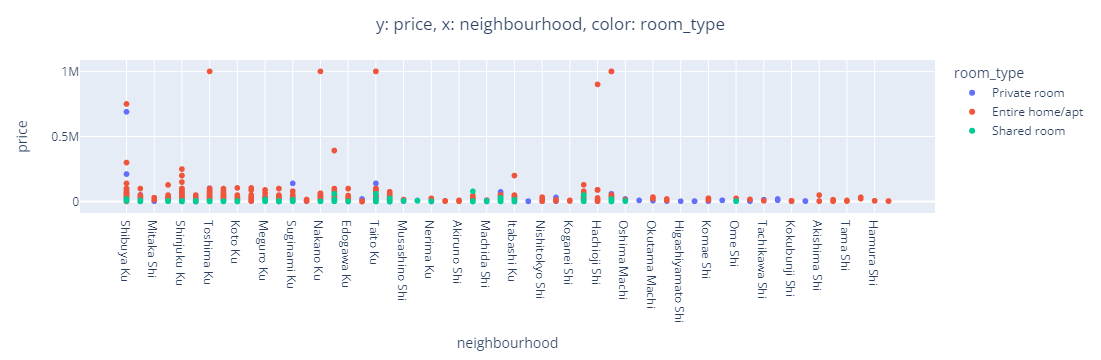

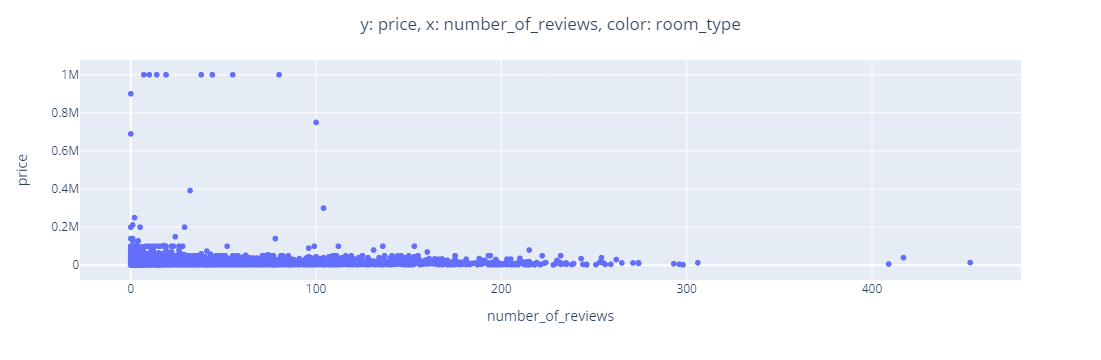

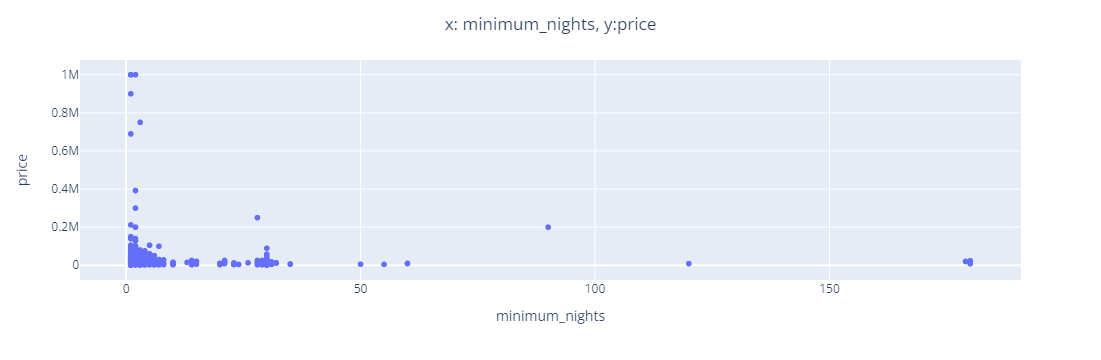

In [26]:

fig1 = px.scatter(data_frame=df, x='neighbourhood', y='price', color='room_type')
fig1.update_layout(title_text='y: price, x: neighbourhood, color: room_type', title_x=0.5)
fig1.show()

fig2 = px.scatter(data_frame=df, x='number_of_reviews', y='price')
fig2.update_layout(title_text='y: price, x: number_of_reviews, color: room_type', title_x=0.5)
fig2.show()

fig3 = px.scatter(data_frame=df, x='minimum_nights', y='price' )
fig3.update_layout(title_text='x: minimum_nights, y:price', title_x=0.5)
fig3.show()


-ku:Ward, -shi:City, -machi:Town, -mura:Village

In [27]:

# Función para extraer la segunda palabra de una cadena
def barrio(neighbourhood):
    palabras = neighbourhood.split()  # Divide la cadena en palabras
    if len(palabras) >= 2:
        return palabras[1]  # Devuelve la segunda palabra
    else:
        return None  # Si no hay segunda palabra, devuelve None

# Aplicar la función a la columna 'neighbourhood' y crear una nueva columna 'segunda_palabra_neighbourhood'
df['segunda_palabra_neighbourhood'] = df['neighbourhood'].apply(barrio)



### Balanceamos outliers con IQR

Balanceamos la columna de precios con IQR para que se ajuste al data set.


In [28]:
def outliers(df, columna):
    # Calcula el primer cuartil (Q1)
    q1 = df[columna].quantile(0.25)

    # Calcula el tercer cuartil (Q3)
    q3 = df[columna].quantile(0.75)

    # Calcula el IQR
    iqr = q3 - q1

    # Imprime los valores de Q1, Q3 y el IQR
    print("Q1:", q1)
    print("Q3:", q3)
    print("IQR:", iqr)

    # Calcula los límites inferior y superior del rango válido
    inferior = q1 - 1.5 * iqr
    superior = q3 + 1.5 * iqr

    # Sustituye los valores fuera del rango con los límites
    df[columna] = df[columna].apply(lambda x: inferior if x < inferior else (superior if x > superior else x))
    
    return df

df = outliers(df, 'price')


Q1: 6026.0
Q3: 17216.0
IQR: 11190.0


### Graficamos para ver como de balanceado está el dataset

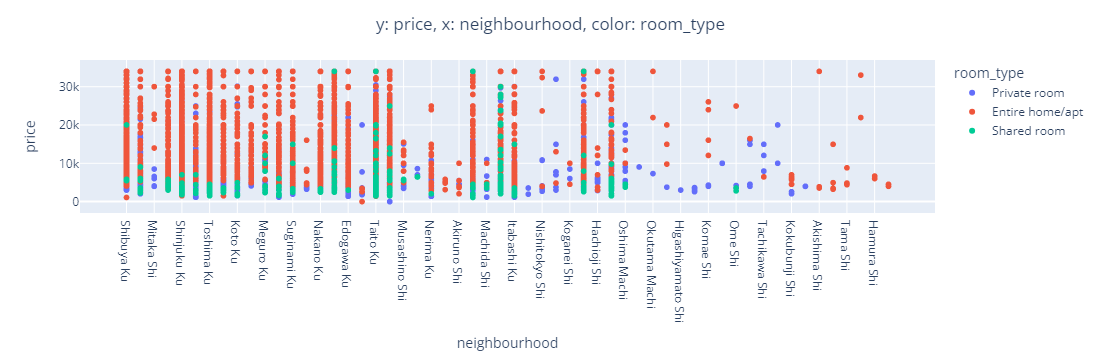

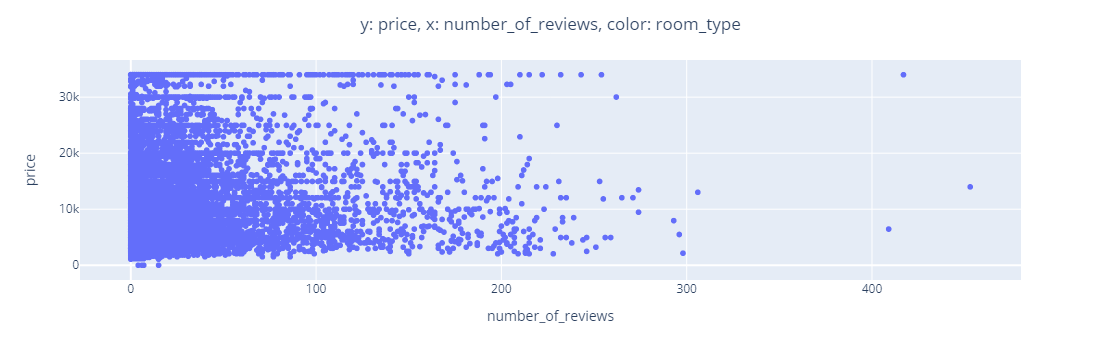

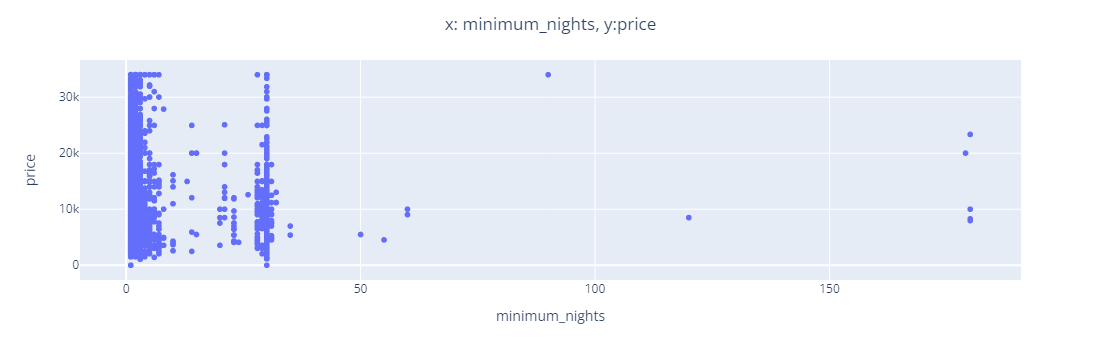

In [29]:

fig1 = px.scatter(data_frame=df, x='neighbourhood', y='price', color='room_type')
fig1.update_layout(title_text='y: price, x: neighbourhood, color: room_type', title_x=0.5)
fig1.show()

fig2 = px.scatter(data_frame=df, x='number_of_reviews', y='price')
fig2.update_layout(title_text='y: price, x: number_of_reviews, color: room_type', title_x=0.5)
fig2.show()

fig3 = px.scatter(data_frame=df, x='minimum_nights', y='price' )
fig3.update_layout(title_text='x: minimum_nights, y:price', title_x=0.5)
fig3.show()


In [ ]:
df['minimum_nights_90'] = df['minimum_nights'] > 90

df.head()